In [15]:
import pandas as pd
pd.set_option('display.max_rows', 5000)
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [3]:
fixpath = 'D:/honda data/percarpercitydata/'
folders = [ name for name in os.listdir('D:/honda data/percarpercitydata/') if os.path.isdir(os.path.join('D:/honda data/percarpercitydata/', name)) ]

# paths = glob.glob('D:/honda data/percarpercitydata/Ahmedabad - 2016 Oct/')
folders

['Ahmedabad - 2016 Oct',
 'Amritsar - 2016 Jan',
 'Bangalore - 2016 Oct',
 'Calcutta - 2016 Jun',
 'Chennai - 2016 Oct',
 'Delhi (New Data) - 2016 Dec',
 'Delhi - 2015 Nov',
 'Jalandhar - 2016 Feb',
 'Kanpur - 2016 Apr',
 'Lucknow - 2016 May',
 'Ludhiana - 2016 Mar',
 'Mumbai - 2015 Dec',
 'Nagpur - 2016 Jan',
 'Patna - 2016 Jul',
 'Pune - 2015 Dec']

In [4]:
k = {}
for city in folders:
    cars = [ name for name in os.listdir(fixpath + city) if os.path.isdir(os.path.join(fixpath + city, name)) ]
    for y in cars:
        paths = glob.glob(fixpath + city + "/" + y + '/*.csv')
        maxSize = 0
        for ind, file in enumerate(paths):
            prev = os.stat(file).st_size
            if maxSize < prev:
                maxSize = prev
                finalInd = ind
        name = city.split(" ")
        k[name[0] + "_"+ y] = {}
        k[name[0] + "_"+ y]['path'] = paths[finalInd]

In [5]:
k

{'Ahmedabad_GJ01RF4950_Amaze': {'path': 'D:/honda data/percarpercitydata/Ahmedabad - 2016 Oct/GJ01RF4950_Amaze\\A20160704153807a.csv'},
 'Ahmedabad_GJ09BD3161_Mobilio': {'path': 'D:/honda data/percarpercitydata/Ahmedabad - 2016 Oct/GJ09BD3161_Mobilio\\A20160624120858a.csv'},
 'Ahmedabad_GJ20N0977_City': {'path': 'D:/honda data/percarpercitydata/Ahmedabad - 2016 Oct/GJ20N0977_City\\Z20160616162057a.csv'},
 'Amritsar_Amritsar-PB02CE6090_Amaze csv': {'path': 'D:/honda data/percarpercitydata/Amritsar - 2016 Jan/Amritsar-PB02CE6090_Amaze csv\\A20151223064036a.csv'},
 'Amritsar_Amritsar-PB02CH9400_City csv': {'path': 'D:/honda data/percarpercitydata/Amritsar - 2016 Jan/Amritsar-PB02CH9400_City csv\\A20160111143757a.csv'},
 'Amritsar_Amritsar-PB02T0015_Jazz csv': {'path': 'D:/honda data/percarpercitydata/Amritsar - 2016 Jan/Amritsar-PB02T0015_Jazz csv\\A20160112202400a.csv'},
 'Bangalore_KA03MU3992_Amaze': {'path': 'D:/honda data/percarpercitydata/Bangalore - 2016 Oct/KA03MU3992_Amaze\\Z20160

In [43]:
k['Chennai_TN01AU3975_Amaze']['path'] = 'D:\honda data\percarpercitydata\Chennai - 2016 Oct\TN01AU3975_Amaze\A20160807081323a.csv'

In [52]:
k

{'Ahmedabad_GJ01RF4950_Amaze': {'path': 'D:/honda data/percarpercitydata/Ahmedabad - 2016 Oct/GJ01RF4950_Amaze\\A20160704153807a.csv',
  'ha': 0,
  'hb': 0,
  'total_idle_time': 30.466666666666665,
  'idle_instances': 42,
  'clutch_in_idling': 4.333333333333333,
  'ac_in_idle': 29.766666666666666,
  'ac_driving': 52.083333333333336,
  'overspeed': 0.0,
  'fuel_used': 1.4312,
  'Total_distance': 22.0,
  'Total_time': 82.655,
  'Mileage': 0.2661665960921904,
  'fatigue_driving': 0},
 'Ahmedabad_GJ09BD3161_Mobilio': {'path': 'D:/honda data/percarpercitydata/Ahmedabad - 2016 Oct/GJ09BD3161_Mobilio\\A20160624120858a.csv',
  'ha': 0,
  'hb': 0,
  'total_idle_time': 49.45,
  'idle_instances': 9,
  'clutch_in_idling': 3.8333333333333335,
  'ac_in_idle': 49.45,
  'ac_driving': 42.5,
  'overspeed': 0.0,
  'fuel_used': 1.3252000000000002,
  'Total_distance': 22.0,
  'Total_time': 91.965,
  'Mileage': 0.239221442940249,
  'fatigue_driving': 0},
 'Ahmedabad_GJ20N0977_City': {'path': 'D:/honda data/

In [45]:
for keys, item in k.items():
    data = pd.read_csv(item['path'], skiprows = [0], header = [0])
    start = 0
    end = 0
    df = pd.DataFrame()
    for ind in range(data.shape[0]):
        if data['NE'].iloc[ind] > 0:
            start = ind
            break
        else:
            start = None
    for ind in range(data.shape[0] -1,0, -1):
        if data['NE'].iloc[ind] > 0:
            end = ind
            break
        else:
            end = None
    if start:
        data = data.drop(index = range(start))
    if end:
        data = data.drop(index = range(end, data.shape[0]))
    data = data.reset_index(drop = True)
    speed = []
    time=[]
    rpm = []
    clutch=[]
    ac= []
    for ind, x in enumerate(data['Smp.time']):
        if x % 1000 == 0 :
            speed.append(data['VSP'].iloc[ind])
            rpm.append(data['NE'].iloc[ind])
            time.append(x)
            clutch.append(data['CLSW1D'].iloc[ind])
            ac.append(data['ACS'].iloc[ind])
        else:
            continue
    df['speed'] = speed
    df['time'] = time
    df['rpm'] = rpm
    df['clutch'] = clutch
    df['ac'] = ac
    df = df.dropna()
    df['speed'] = df['speed']
    df['time'] = df['time']/1000
    speed_diff = df['speed'] - df['speed'].shift(1)
    time_diff = df['time'] - df['time'].shift(1)
    acc = (speed_diff/time_diff) * 0.0283                          # converting km/h-s to g
    ha = 0
    hb = 0
    idle_time = 0
    idle = 0
    s = 0
    c = 0
    ac_idle = 0
    ac_drive = 0
    for x in acc:
        if x > 0.4:
            ha = ha+1
        elif x < -0.6:
            hb = hb+1
    k[keys]['ha'] = ha
    k[keys]['hb'] = hb
    val = True
    for x in range(len(df['speed'])-1):
        if df['speed'][x] == 0 and df['rpm'][x] > 650:               # Idling
            idle_time = idle_time+1
            if val:
                idle += 1
                val = False
            if df['clutch'][x] == 1:
                c += 1
            if df['ac'][x] == 1:
                ac_idle += 1
        elif df['speed'][x] != 0 and df['rpm'][x] > 650:
            if df['ac'][x] == 1:
                ac_drive += 1
            val = True

    k[keys]['total_idle_time'] = idle_time/60
    k[keys]['idle_instances'] = idle
    k[keys]['clutch_in_idling'] = c/60
    k[keys]['ac_in_idle'] = ac_idle/60
    k[keys]['ac_driving'] = ac_drive/60
#     k[keys]['idling_times'] = idle
    for x in df['speed']:
        if x>90:
            s = s+1
    k[keys]['overspeed'] = s/60
    
    k[keys]['fuel_used'] = (data['ENG_FUEL_USED'].iloc[-1] - data['ENG_FUEL_USED'].iloc[0])/1000
    k[keys]['Total_distance'] = data['METER_ODO_DATA'].iloc[-1] - data['METER_ODO_DATA'].iloc[0]
    k[keys]['Total_time'] = data['Smp.time'].iloc[-1]/(1000*60)
    k[keys]['Mileage'] = k[keys]['Total_distance']/k[keys]['Total_time']
    if k[keys]['Total_time'] > 360:
        k[keys]['fatigue_driving'] = 1
    else:
        k[keys]['fatigue_driving'] = 0    

In [53]:
k

{'Ahmedabad_GJ01RF4950_Amaze': {'path': 'D:/honda data/percarpercitydata/Ahmedabad - 2016 Oct/GJ01RF4950_Amaze\\A20160704153807a.csv',
  'ha': 0,
  'hb': 0,
  'total_idle_time': 30.466666666666665,
  'idle_instances': 42,
  'clutch_in_idling': 4.333333333333333,
  'ac_in_idle': 29.766666666666666,
  'ac_driving': 52.083333333333336,
  'overspeed': 0.0,
  'fuel_used': 1.4312,
  'Total_distance': 22.0,
  'Total_time': 82.655,
  'Mileage': 0.2661665960921904,
  'fatigue_driving': 0},
 'Ahmedabad_GJ09BD3161_Mobilio': {'path': 'D:/honda data/percarpercitydata/Ahmedabad - 2016 Oct/GJ09BD3161_Mobilio\\A20160624120858a.csv',
  'ha': 0,
  'hb': 0,
  'total_idle_time': 49.45,
  'idle_instances': 9,
  'clutch_in_idling': 3.8333333333333335,
  'ac_in_idle': 49.45,
  'ac_driving': 42.5,
  'overspeed': 0.0,
  'fuel_used': 1.3252000000000002,
  'Total_distance': 22.0,
  'Total_time': 91.965,
  'Mileage': 0.239221442940249,
  'fatigue_driving': 0},
 'Ahmedabad_GJ20N0977_City': {'path': 'D:/honda data/

In [54]:
df = pd.DataFrame(k)
df.columns

Index(['Ahmedabad_GJ01RF4950_Amaze', 'Ahmedabad_GJ09BD3161_Mobilio',
       'Ahmedabad_GJ20N0977_City', 'Amritsar_Amritsar-PB02CE6090_Amaze csv',
       'Amritsar_Amritsar-PB02CH9400_City csv',
       'Amritsar_Amritsar-PB02T0015_Jazz csv', 'Bangalore_KA03MU3992_Amaze',
       'Bangalore_KA03MU6732_Mobilio', 'Calcutta_WB02AG-2199_City',
       'Calcutta_WB02AH-1581_Amaze', 'Calcutta_WB26T-1987_Mobilio',
       'Calcutta_WB26T-7009_Jazz', 'Chennai_TN01AU3975_Amaze',
       'Chennai_TN01AX3294_Mobilio', 'Chennai_TN146999_City',
       'Delhi_DL04641_Jazz', 'Delhi_DL0468_Amaze', 'Delhi_DL1811_City',
       'Delhi_DL10CH0365_Honda Amaze', 'Delhi_DL3CBE9134_Honda City',
       'Jalandhar_Jalandhar-PB07Z2554_Amaze',
       'Jalandhar_Jalandhar-PB08CQ9011_City', 'Kanpur_UP78DL2933_Amaze',
       'Kanpur_UP78DV3974_City', 'Kanpur_UP78DW5006_Mobilio',
       'Lucknow_UP32FR-1999_City', 'Lucknow_UP32GU-7951_Mobilio',
       'Lucknow_UP65BW-6665_Amaze', 'Ludhiana_Ludhiana-PB10FK2162',
       'Lud

In [68]:
df1 = df.drop('path')
amaze = df1[['Ahmedabad_GJ01RF4950_Amaze', 'Amritsar_Amritsar-PB02CE6090_Amaze csv', 'Bangalore_KA03MU3992_Amaze',
           'Calcutta_WB02AH-1581_Amaze', 'Chennai_TN01AU3975_Amaze', 'Delhi_DL0468_Amaze', 'Delhi_DL10CH0365_Honda Amaze',
          'Jalandhar_Jalandhar-PB07Z2554_Amaze', 'Kanpur_UP78DL2933_Amaze', 'Lucknow_UP65BW-6665_Amaze',
           'Ludhiana_Ludhiana-PB10TC3195', 'Mumbai_MH05BS7091_Amaze', 'Nagpur_Nagpur-MH31EK2745_Amaze',
           'Patna_BR01BU3474_Amaze']]
mobilio = df1[['Ahmedabad_GJ09BD3161_Mobilio', 'Bangalore_KA03MU6732_Mobilio', 'Calcutta_WB26T-1987_Mobilio',
               'Chennai_TN01AX3294_Mobilio', 'Kanpur_UP78DW5006_Mobilio', 'Lucknow_UP32GU-7951_Mobilio',
               'Nagpur_Nagpur-MH49B9780_Mobilio', 'Pune_Pune_Mobilio_MH14EU6057']]
jazz = df1[['Amritsar_Amritsar-PB02T0015_Jazz csv', 'Calcutta_WB26T-7009_Jazz', 'Delhi_DL04641_Jazz',
            'Ludhiana_Ludhiana-PB10FK2162']]
city = df1[['Ahmedabad_GJ20N0977_City', 'Amritsar_Amritsar-PB02CH9400_City csv', 'Calcutta_WB02AG-2199_City',
           'Chennai_TN146999_City', 'Delhi_DL1811_City', 'Delhi_DL3CBE9134_Honda City', 'Jalandhar_Jalandhar-PB08CQ9011_City',
           'Kanpur_UP78DV3974_City', 'Lucknow_UP32FR-1999_City', 'Ludhiana_Ludhiana-PB10FL6457', 'Mumbai_MH03BJ7186_City',
           'Nagpur_Nagpur-MH31EK9700_City', 'Patna_BR01CA2026_City', 'Pune_Pune_City_MH14EP0401']]

In [70]:
# df2 = df2.to_numeric()
amaze = amaze.transpose()

In [71]:
amaze

,ha,hb,total_idle_time,idle_instances,clutch_in_idling,ac_in_idle,ac_driving,overspeed,fuel_used,Total_distance,Total_time,Mileage,fatigue_driving
Ahmedabad_GJ01RF4950_Amaze,0,0,30.4667,42,4.33333,29.7667,52.0833,0,1.4312,22,82.655,0.266167,0
Amritsar_Amritsar-PB02CE6090_Amaze csv,0,0,12.25,42,4.18333,0,0,37.3667,3.2162,205,196.252,1.04458,0
Bangalore_KA03MU3992_Amaze,0,0,27.1,137,17.8667,0,0,0,0,12,80.5017,0.149065,0
Calcutta_WB02AH-1581_Amaze,0,0,22.1,57,5.43333,21.0333,185.367,7.4,0,169,210.485,0.802908,0
Chennai_TN01AU3975_Amaze,0,0,21.7167,46,2.78333,21.5333,65.2667,0,2.0663,37,88.3217,0.418923,0
Delhi_DL0468_Amaze,0,0,27.15,58,3.7,10.2667,23.0167,0,1.6916,35,97.5,0.358974,0
Delhi_DL10CH0365_Honda Amaze,0,0,28.5333,141,18.2833,26.2333,160.15,16.7,1.978,136,189.015,0.71952,0
Jalandhar_Jalandhar-PB07Z2554_Amaze,0,0,25.8,55,12.1833,25.6167,111.5,14.15,0,115,174.518,0.658957,0
Kanpur_UP78DL2933_Amaze,0,0,4.26667,29,2.1,0,0,0,0.6249,13,42.1983,0.308069,0
Lucknow_UP65BW-6665_Amaze,10,6,68.3667,81,6.58333,55.4167,106.7,5.25,0,119,190.112,0.625948,0


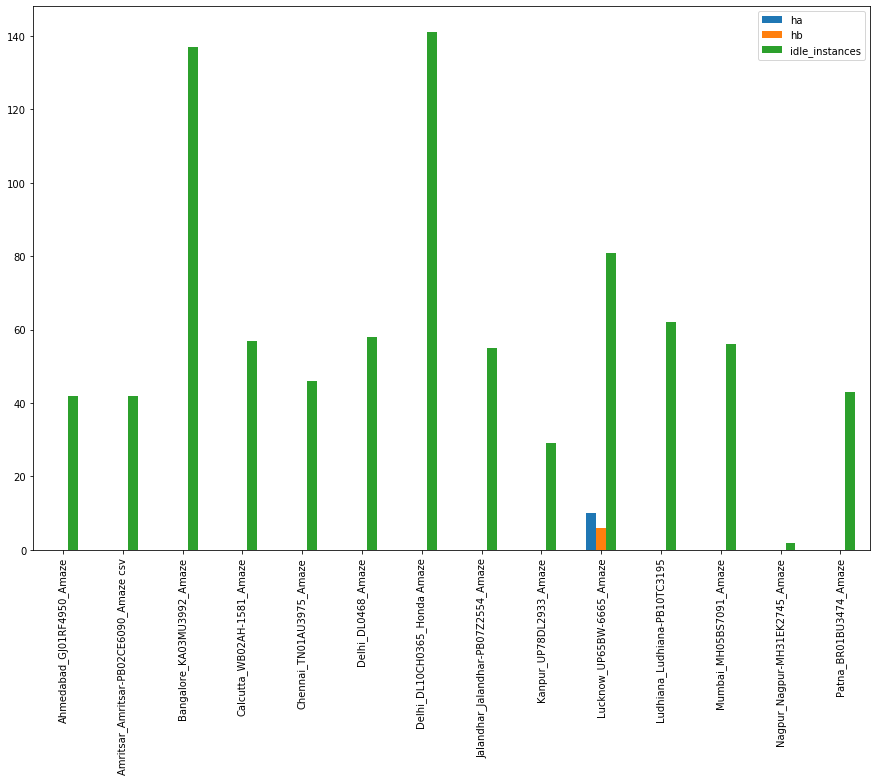

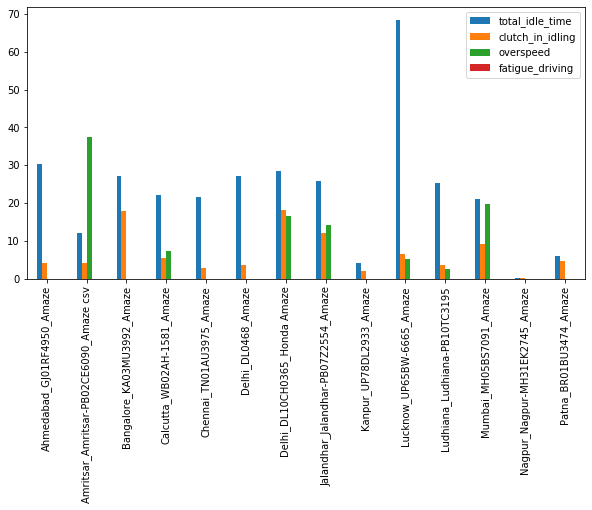

In [72]:
amaze[['ha', 'hb', 'idle_instances']].plot(kind = 'bar', figsize=(10,10))

amaze[['total_idle_time', 'clutch_in_idling', 'overspeed', 'fatigue_driving']].plot(kind = 'bar', figsize=(10,5))

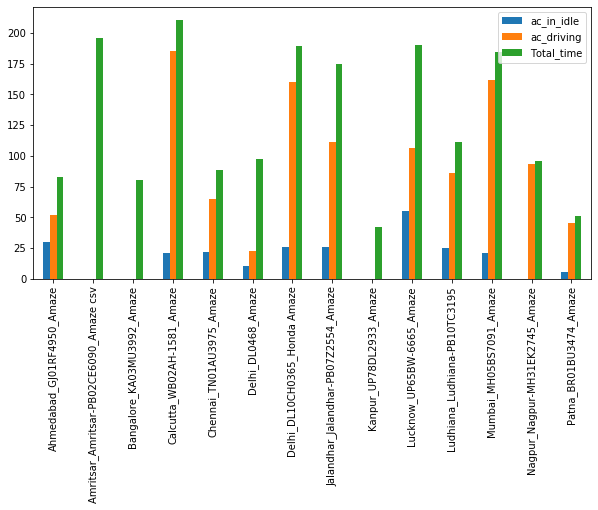

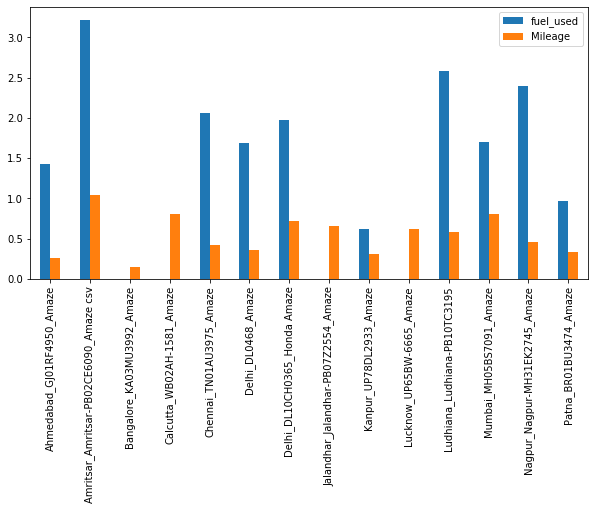

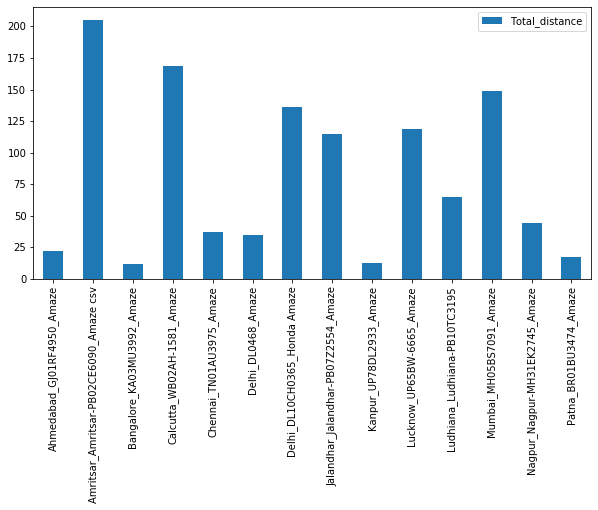

In [73]:
amaze[['ac_in_idle', 'ac_driving', 'Total_time']].plot(kind = 'bar', figsize=(10,5))

amaze[['fuel_used', 'Mileage']].plot(kind = 'bar', figsize=(10,5))

amaze[['Total_distance']].plot(kind = 'bar', figsize=(10,5))



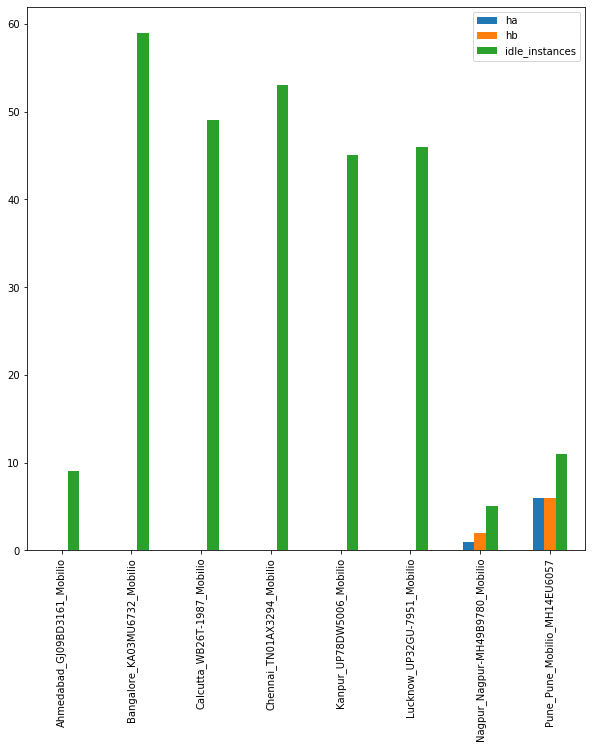

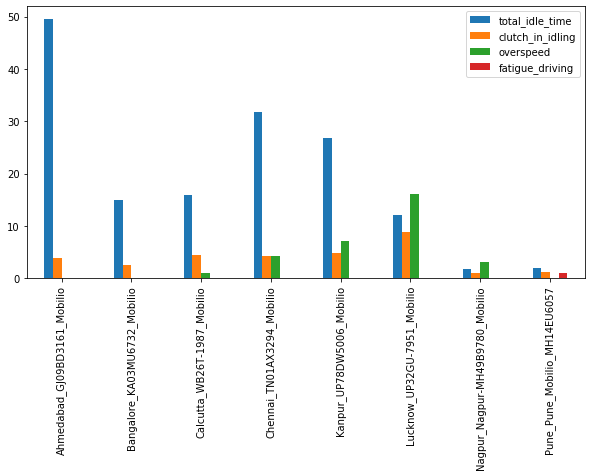

In [74]:
mobilio = mobilio.transpose()
mobilio[['ha', 'hb', 'idle_instances']].plot(kind = 'bar', figsize=(10,10))

mobilio[['total_idle_time', 'clutch_in_idling', 'overspeed', 'fatigue_driving']].plot(kind = 'bar', figsize=(10,5))

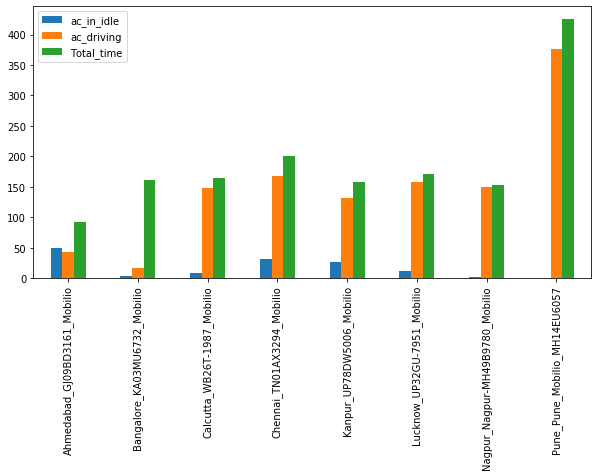

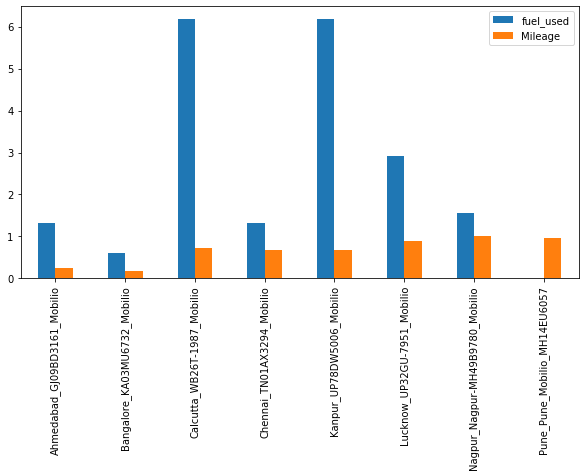

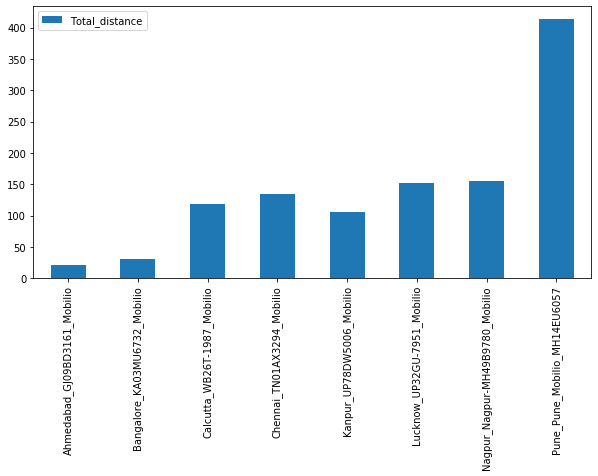

In [75]:
mobilio[['ac_in_idle', 'ac_driving', 'Total_time']].plot(kind = 'bar', figsize=(10,5))

mobilio[['fuel_used', 'Mileage']].plot(kind = 'bar', figsize=(10,5))

mobilio[['Total_distance']].plot(kind = 'bar', figsize=(10,5))



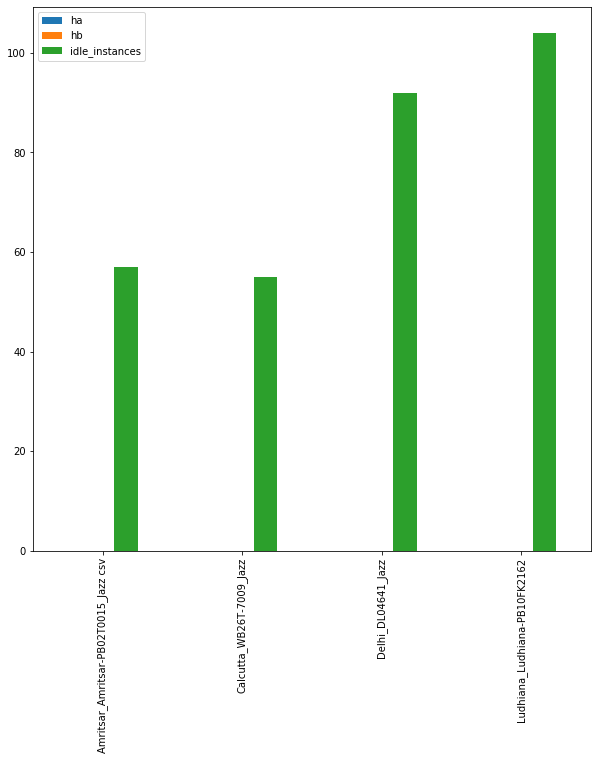

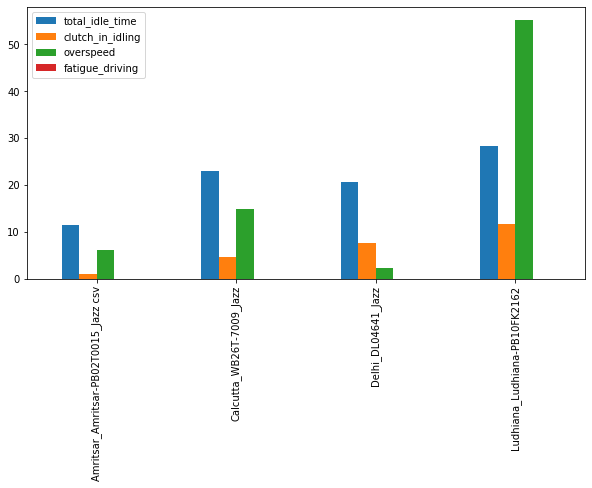

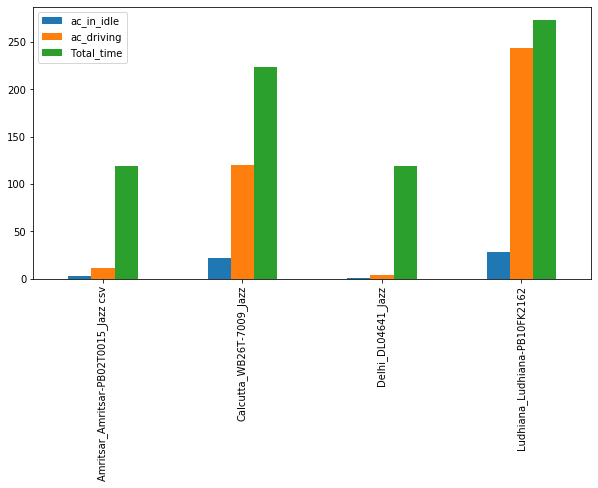

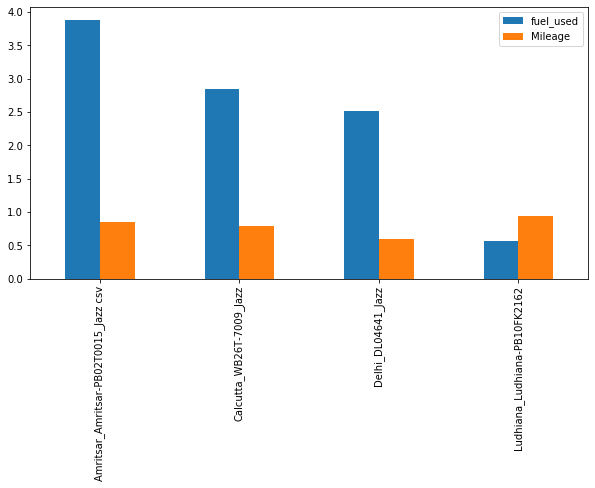

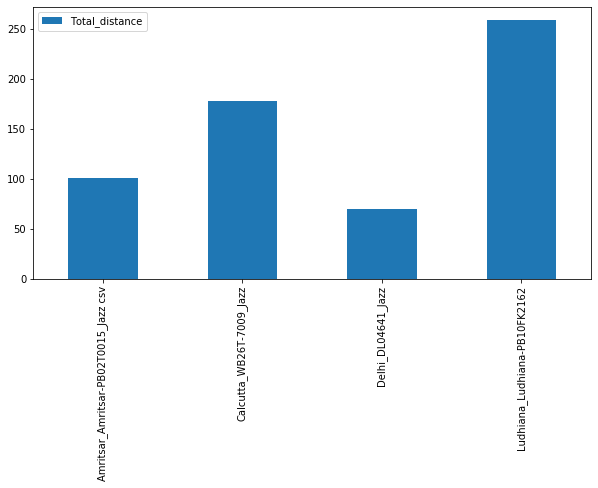

In [76]:
jazz = jazz.transpose()
jazz[['ha', 'hb', 'idle_instances']].plot(kind = 'bar', figsize=(10,10))

jazz[['total_idle_time', 'clutch_in_idling', 'overspeed', 'fatigue_driving']].plot(kind = 'bar', figsize=(10,5))
jazz[['ac_in_idle', 'ac_driving', 'Total_time']].plot(kind = 'bar', figsize=(10,5))

jazz[['fuel_used', 'Mileage']].plot(kind = 'bar', figsize=(10,5))

jazz[['Total_distance']].plot(kind = 'bar', figsize=(10,5))


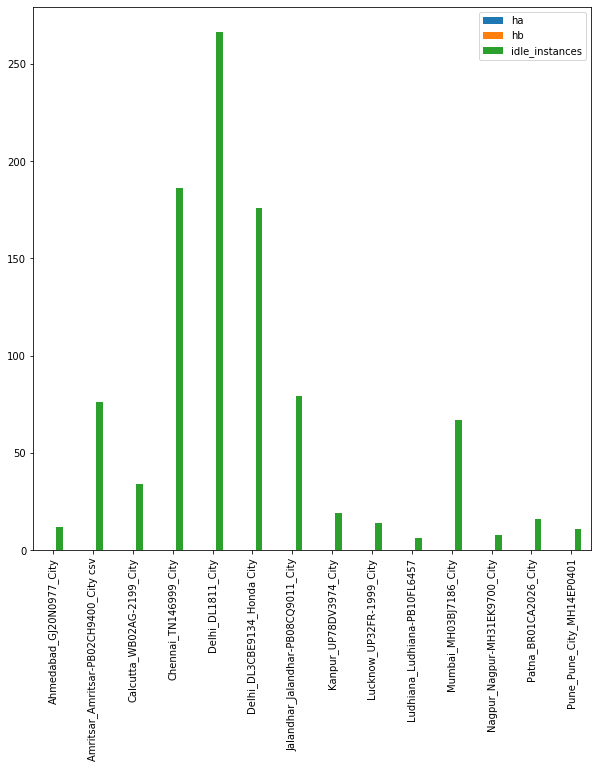

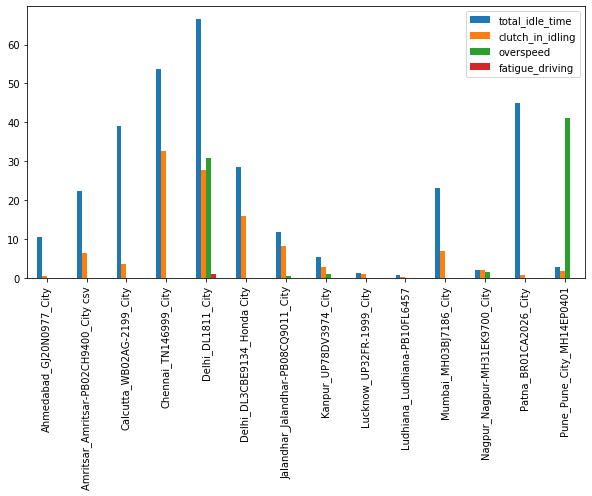

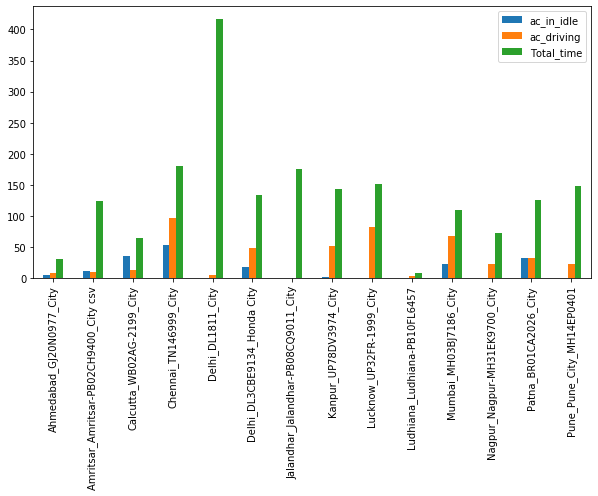

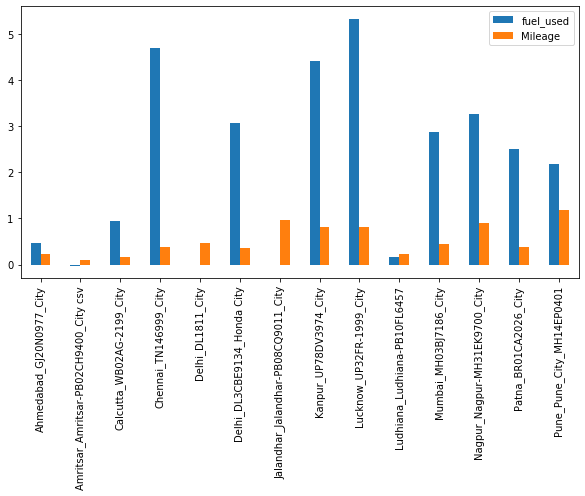

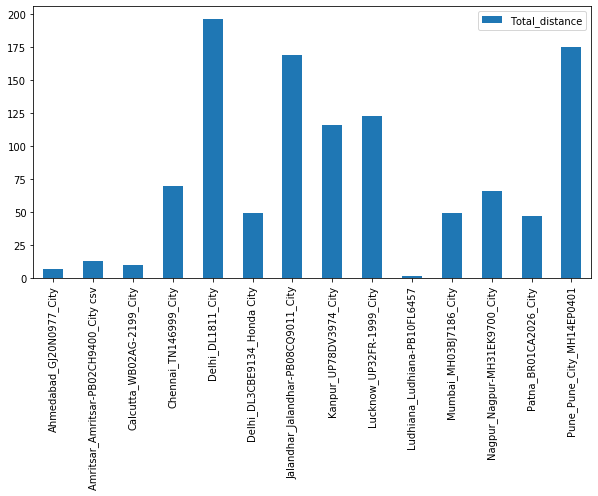

In [77]:
city = city.transpose()
city[['ha', 'hb', 'idle_instances']].plot(kind = 'bar', figsize=(10,10))

city[['total_idle_time', 'clutch_in_idling', 'overspeed', 'fatigue_driving']].plot(kind = 'bar', figsize=(10,5))
city[['ac_in_idle', 'ac_driving', 'Total_time']].plot(kind = 'bar', figsize=(10,5))

city[['fuel_used', 'Mileage']].plot(kind = 'bar', figsize=(10,5))

city[['Total_distance']].plot(kind = 'bar', figsize=(10,5))
